<a href="https://colab.research.google.com/github/natashakarmali/nkarmali-uw.edu/blob/master/Neural_Network_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Testing Neural Network Models to Claffisfy Rock Paper Scissor Images**

# **Data Import**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-27 01:38:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   221MB/s    in 0.9s    

2020-04-27 01:38:13 (221 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-27 01:38:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

In [2]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


# **Data Pre-Processing**

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-115.png', 'rock05ck01-047.png', 'rock03-075.png', 'rock01-024.png', 'rock07-k03-054.png', 'rock03-077.png', 'rock07-k03-019.png', 'rock01-001.png', 'rock06ck02-011.png', 'rock07-k03-032.png']
['paper02-067.png', 'paper05-033.png', 'paper01-003.png', 'paper05-060.png', 'paper05-102.png', 'paper07-007.png', 'paper05-081.png', 'paper02-109.png', 'paper04-018.png', 'paper04-116.png']
['scissors02-055.png', 'testscissors03-093.png', 'scissors02-090.png', 'testscissors03-042.png', 'testscissors02-091.png', 'scissors02-098.png', 'scissors04-066.png', 'testscissors02-031.png', 'testscissors01-050.png', 'testscissors02-067.png']


In [4]:
rock_dir_test = os.path.join('/tmp/rps-test-set/rock')
paper_dir_test = os.path.join('/tmp/rps-test-set/paper')
scissors_dir_test = os.path.join('/tmp/rps-test-set/scissors')

print('total training rock images:', len(os.listdir(rock_dir_test)))
print('total training paper images:', len(os.listdir(paper_dir_test)))
print('total training scissors images:', len(os.listdir(scissors_dir_test)))

rock_files_test = os.listdir(rock_dir_test)
print(rock_files_test[:10])

paper_files_test = os.listdir(paper_dir_test)
print(paper_files_test[:10])

scissors_files_test = os.listdir(scissors_dir_test)
print(scissors_files_test[:10])

total training rock images: 124
total training paper images: 124
total training scissors images: 124
['testrock03-04.png', 'testrock04-02.png', 'testrock03-19.png', 'testrock01-10.png', 'testrock04-17.png', 'testrock02-18.png', 'testrock03-06.png', 'testrock04-04.png', 'testrock03-25.png', 'testrock02-01.png']
['testpaper04-00.png', 'testpaper03-12.png', 'testpaper03-03.png', 'testpaper03-10.png', 'testpaper03-23.png', 'testpaper04-08.png', 'testpaper04-09.png', 'testpaper02-03.png', 'testpaper01-28.png', 'testpaper04-20.png']
['testscissors03-01.png', 'testscissors04-10.png', 'testscissors03-04.png', 'testscissors02-08.png', 'testscissors02-09.png', 'testscissors01-26.png', 'testscissors02-06.png', 'testscissors01-04.png', 'testscissors01-13.png', 'testscissors03-28.png']


# **Data Visualization**

/tmp/rps/rock/rock07-k03-115.png


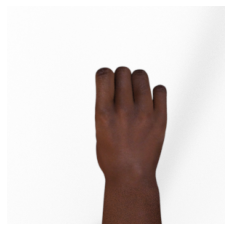

/tmp/rps/rock/rock05ck01-047.png


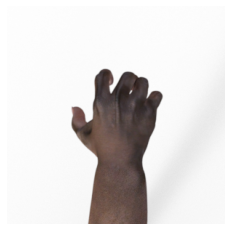

/tmp/rps/paper/paper02-067.png


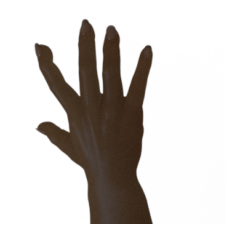

/tmp/rps/paper/paper05-033.png


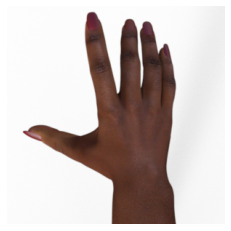

/tmp/rps/scissors/scissors02-055.png


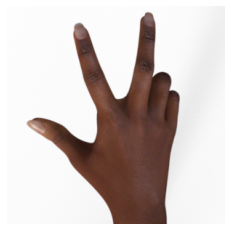

/tmp/rps/scissors/testscissors03-093.png


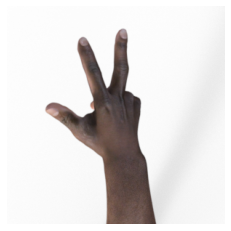

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# **Data Processing**

In [0]:
import shutil
# Creating train and test subsets
#path to main directory
original_dataset_dir = '/tmp'

#directory to store subsets
base_dir = '/tmp/rock_paper_scissors'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

#directories for our training, test
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#directory for each class train
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

#directory for each class validation
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

#directory for each class test
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)

In [0]:
#renaming
os.chdir('/tmp/rps/paper')
i=0
for x in os.listdir('/tmp/rps/paper'):
  src = x
  dst = 'paper'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

os.chdir('/tmp/rps/rock')
i=0
for x in os.listdir('/tmp/rps/rock'):
  src = x
  dst = 'rock'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

os.chdir('/tmp/rps/scissors')
i=0
for x in os.listdir('/tmp/rps/scissors'):
  src = x
  dst = 'scissors'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

In [0]:
#renaming
os.chdir('/tmp/rps-test-set/paper')
i=0
for x in os.listdir('/tmp/rps-test-set/paper'):
  src=x
  dst="testpaper"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

os.chdir('/tmp/rps-test-set/rock')
i=0
for x in os.listdir('/tmp/rps-test-set/rock'):
  src=x
  dst="testrock"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

os.chdir('/tmp/rps-test-set/scissors')
i=0
for x in os.listdir('/tmp/rps-test-set/scissors'):
  src=x
  dst="testscissors"+str(i)+".png"
  os.rename(src,dst)
  i= i + 1

In [0]:
#copying images
fnames = ['paper{}.png'.format(i) for i in range(588)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(train_paper_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['paper{}.png'.format(i) for i in range(588, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(validation_paper_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['testpaper{}.png'.format(i) for i in range(124)]
for fname in fnames:
  src = os.path.join('/tmp/rps-test-set/paper', fname)
  dst = os.path.join(test_paper_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['rock{}.png'.format(i) for i in range(588)]
for fname in fnames:
  src = os.path.join('/tmp/rps/rock', fname)
  dst = os.path.join(train_rock_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['rock{}.png'.format(i) for i in range(588, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/rock', fname)
  dst = os.path.join(validation_rock_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['testrock{}.png'.format(i) for i in range(124)]
for fname in fnames:
  src = os.path.join('/tmp/rps-test-set/rock', fname)
  dst = os.path.join(test_rock_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['scissors{}.png'.format(i) for i in range(588)]
for fname in fnames:
  src = os.path.join('/tmp/rps/scissors', fname)
  dst = os.path.join(train_scissors_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['scissors{}.png'.format(i) for i in range(588, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/scissors', fname)
  dst = os.path.join(validation_scissors_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['testscissors{}.png'.format(i) for i in range(124)]
for fname in fnames:
  src = os.path.join('/tmp/rps-test-set/scissors', fname)
  dst = os.path.join(test_scissors_dir, fname)
  shutil.copyfile(src, dst)

In [10]:
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training scissor images:', len(os.listdir(train_scissors_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation scissor images:', len(os.listdir(validation_scissors_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test scissor images:', len(os.listdir(test_scissors_dir)))

total training paper images: 588
total training rock images: 588
total training scissor images: 588
total validation paper images: 252
total validation rock images: 252
total validation scissor images: 252
total test paper images: 124
total test rock images: 124
total test scissor images: 124


# **Building & Testing Models**

In [11]:
import keras 
keras.__version__
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


**Simple Neural Network**

In [12]:
network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu', input_shape = (300, 300, 3),))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Flatten())
network.add(layers.Dense(3, activation= 'softmax'))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300, 300, 128)     512       
_________________________________________________________________
dense_2 (Dense)              (None, 300, 300, 128)     16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 11520000)          0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 34560003  
Total params: 34,577,027
Trainable params: 34,577,027
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer= optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics= ['acc'])

**Convolutional Neural Network w/ Max Pooling**

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(3, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [0]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics= ['acc'])

**Image Processing for Training and Validation**

In [16]:
train_datagen = ImageDataGenerator(rescale= 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (300, 300), batch_size = 20, class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (300,300), batch_size = 20, class_mode = 'categorical')

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.


**Testing Accuracy of Neural Network Model**

In [17]:
nn_history = network.fit_generator(train_generator, steps_per_epoch = 50, epochs = 10, validation_data= validation_generator, validation_steps=50)

Epoch 1/10
50/50 [==============================] - 197s 4s/step - loss: 104.5409 - acc: 0.4776 - val_loss: 0.2875 - val_acc: 0.8876
Epoch 2/10
50/50 [==============================] - 194s 4s/step - loss: 1.0928 - acc: 0.7670 - val_loss: 0.2189 - val_acc: 0.9689
Epoch 3/10
50/50 [==============================] - 194s 4s/step - loss: 1.2571 - acc: 0.8940 - val_loss: 12.2836 - val_acc: 0.4669
Epoch 4/10
50/50 [==============================] - 195s 4s/step - loss: 0.9645 - acc: 0.9143 - val_loss: 0.0046 - val_acc: 0.9919
Epoch 5/10
50/50 [==============================] - 195s 4s/step - loss: 2.6923 - acc: 0.8860 - val_loss: 0.0020 - val_acc: 0.9950
Epoch 6/10
50/50 [==============================] - 193s 4s/step - loss: 1.8138 - acc: 0.9614 - val_loss: 0.5884 - val_acc: 0.8062
Epoch 7/10
50/50 [==============================] - 199s 4s/step - loss: 0.1674 - acc: 0.9730 - val_loss: 6.1825e-04 - val_acc: 0.9929
Epoch 8/10
50/50 [==============================] - 195s 4s/step - loss: 2.8

**Testing Accuracy of Convolutional Neural Network**

In [25]:
cnn_history = model.fit_generator(train_generator, steps_per_epoch = 50, epochs = 10, validation_data= validation_generator, validation_steps=50)

Epoch 1/10
50/50 [==============================] - 115s 2s/step - loss: 1.1301 - acc: 0.9797 - val_loss: 4.1025e-05 - val_acc: 1.0000
Epoch 2/10
50/50 [==============================] - 116s 2s/step - loss: 4.6367e-05 - acc: 1.0000 - val_loss: 1.0729e-07 - val_acc: 1.0000
Epoch 3/10
50/50 [==============================] - 114s 2s/step - loss: 7.8318e-07 - acc: 1.0000 - val_loss: 1.1325e-07 - val_acc: 1.0000
Epoch 4/10
50/50 [==============================] - 116s 2s/step - loss: 5.1260e-08 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
50/50 [==============================] - 114s 2s/step - loss: 7.6318e-09 - acc: 1.0000 - val_loss: 1.7881e-08 - val_acc: 1.0000
Epoch 6/10
50/50 [==============================] - 117s 2s/step - loss: 1.7887e-09 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
50/50 [==============================] - 116s 2s/step - loss: 4.7684e-10 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
50/50 [=============

**Visualizing Accuracy**

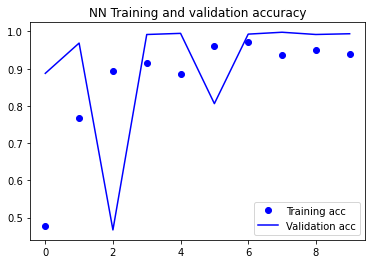

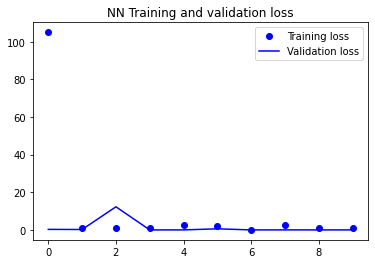

In [30]:
import matplotlib.pyplot as plt
acc = nn_history.history['acc']
val_acc = nn_history.history['val_acc']
loss = nn_history.history['loss']
val_loss = nn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('NN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('NN Training and validation loss')
plt.legend()

plt.show()

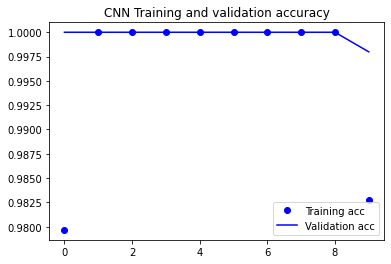

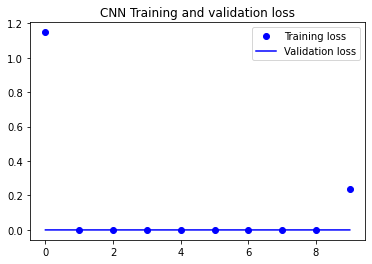

In [31]:
acc = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN Training and validation loss')
plt.legend()

plt.show()

In [32]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(300, 300), batch_size=32, class_mode='categorical')

Found 372 images belonging to 3 classes.


In [33]:
model_score = model.evaluate_generator(test_generator,steps=20)
print("CNN Model Test Loss:",model_score[0])
print("CNN Model Test Accuracy:",model_score[1])

CNN Model Test Loss: 8.621521949768066
CNN Model Test Accuracy: 0.7754777073860168


In [34]:
nn_model_score = network.evaluate_generator(test_generator,steps=20)
print("NN Model Test Loss:",nn_model_score[0])
print("NN Model Test Accuracy:",nn_model_score[1])

NN Model Test Loss: 5.698295593261719
NN Model Test Accuracy: 0.5684713125228882


### *# Take Away: CNN, while more computational expensive, acheives a great accuracy than NN. This is due to its ability to capture local featues via maxpooling.*

# **Test with your own image!**

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper.png to paper (1).png
paper.png
[[0. 1. 0.]]
